# Random Sample imputation:

**RANDOM SAMPLE IMPUTATION:** 

As per name, here we will fill missing values in our data with random numbers. This random number will be selected from the other numbers which are present in same column of data where we have a missing value. This technique can be applied to categorical data too.

Benfit: It is easy to use and done using pandas. The variance of data is intact and it is not affected. We use thi technique only for linear algorithm not tree based algorithm.

Demerit: Covariance is affected because of this technique. It is a memory heavy for deployment as we need to store the original training set to extract the values from and replace missing values from upcoming observation.

Here’s a simple example to help you understand:

Imagine you have a list of people’s ages, but some ages are missing. You want to fill in those gaps using random value imputation.

Original Data:

25
30
[Missing]
35
[Missing]
40
To use random value imputation, you would do the following:

First, you’d look at the ages that are already known (25, 30, 35, and 40).

Then, you’d randomly select ages from this list and assign them to the missing values. For example, you might randomly choose 30 and 35 to fill in the missing ages.

Modified Data:

25
30
30
35
40
35

In this way, you’ve used existing data to make educated guesses for the missing values, making your dataset more complete. Random value imputation is a simple way to handle missing data, but it may not always be the most accurate method, especially if your dataset is large or the missing data is important. Other imputation methods, like mean imputation or regression imputation, may be more appropriate in certain situations.

**Advantages**
- Both apply on num and cat columns.
- Easy to apply.
- Distribution remians same.
- Good for linear reg algo.
  
**Disadvantages**
- Bad for descion tree algo.
- Covarience change.

## Import libraries:

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Load Dataset:

In [75]:
df=pd.read_csv('../Data/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [76]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,18679.000000,19093.000000,18392.000000,19158.000000
mean,16875.358179,0.828951,9.928036,65.185787,0.249348
std,9616.292592,0.123334,6.505268,59.885626,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


In [77]:
(df.isnull().mean()*100).sort_values(ascending=False)

company_type              32.049274
company_size              30.994885
gender                    23.530640
major_discipline          14.683161
training_hours             3.998330
city_development_index     2.500261
education_level            2.401086
enrolled_university        2.014824
experience                 0.339284
enrollee_id                0.000000
city                       0.000000
relevent_experience        0.000000
target                     0.000000
dtype: float64

In [78]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'training_hours', 'target'],
      dtype='object')

In [79]:
X=df.drop(columns=['enrollee_id','city', 'city_development_index', 'gender','relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'company_size', 'company_type',
       'training_hours', 'target'])
y=df['target']

# Train test split:

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [81]:
#For checking the distribution of original and imputation column
X_train['exp_imp']=X_train['experience']
X_test['exp_imp']=X_test['experience']

In [82]:
X_train.head()

,experience,exp_imp
7869,2.0,2.0
2884,8.0,8.0
7207,7.0,7.0
3807,0.0,0.0
1861,7.0,7.0


In [83]:
X_train.isnull().sum()

experience    49
exp_imp       49
dtype: int64

In [84]:
#[X_train['exp_imp'].isnull().sum()] || Tells how much missing values values.
#X_train['experience'].dropna() || drop those value that is missing.
#.sample(X_train['experience'].isnull().sum()) || take a random sample number.

X_train['exp_imp'][X_train['exp_imp'].isnull()]=X_train['experience'].dropna().sample(X_train['experience'].isnull().sum()).values

C:\Users\Admin\AppData\Local\Temp\ipykernel_10288\192040764.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['exp_imp'][X_train['exp_imp'].isnull()]=X_train['experience'].dropna().sample(X_train['experience'].isnull().sum()).value

In [85]:
X_train.isnull().sum()

experience    49
exp_imp        0
dtype: int64

**Check Distribution**


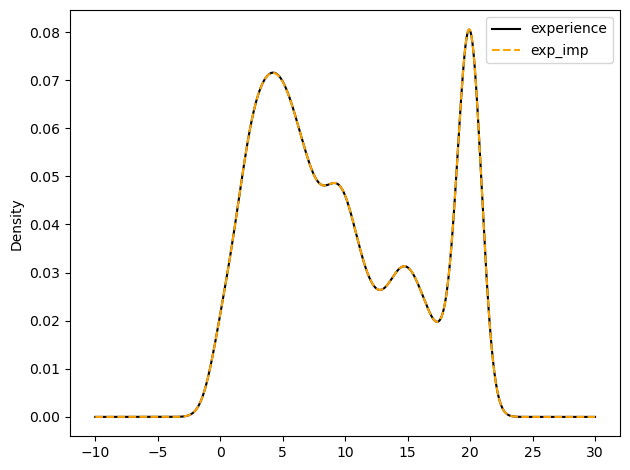

In [118]:
X_train['experience'].plot(kind='kde', label='experience', color='black')
X_train['exp_imp'].plot(kind='kde', label='exp_imp', color='orange',linestyle='--')

plt.legend()
plt.tight_layout()
plt.show()

**Check Varience & CO varience**

In [114]:
X_train.var()

experience    42.312723
exp_imp       42.311714
dtype: float64

In [115]:
X_train.cov()

,experience,exp_imp
experience,42.312723,42.312723
exp_imp,42.312723,42.311714


<Axes: >

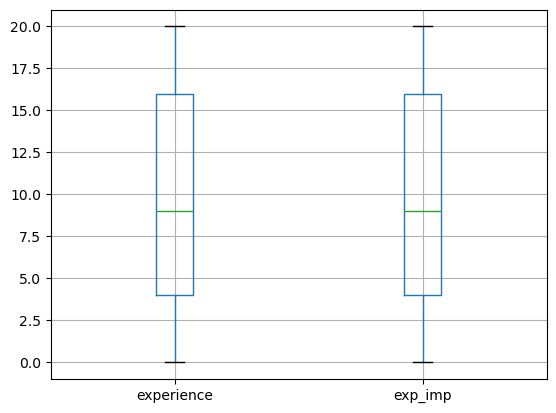

In [116]:
X_train.boxplot()

**ALL GOOD.**